# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', 500)

#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/sau.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
# convert dict type columns to dataframes
for category in ngs_reads:
    if type(ngs_reads[category][0]) is dict:
        ngs_reads[category] = ngs_reads[category].apply(pd.DataFrame)

#### extract target variable

In [5]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### remove unfinished columns from dataset

In [6]:
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ngs_reads.drop(ngs_reads.columns[cols], axis=1, inplace=True)

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,total_sequences,percent_gc,min_sequence_length,max_sequence_length,status_module_0,status_module_1,status_module_2,status_module_3,status_module_4,status_module_5,status_module_6,status_module_7,status_module_8,status_module_9,status_module_10
0,511669,34,35,301,2,0,2,2,0,2,2,1,2,2,2
1,220494,34,35,301,2,2,1,2,0,2,2,1,2,2,2
2,6015314,65,35,301,2,0,1,2,0,1,2,1,1,2,2
3,1916272,35,35,301,2,2,2,2,0,2,2,1,1,2,2
4,334,35,69,301,2,0,0,2,0,0,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1210750,34,35,251,2,2,2,2,0,2,2,1,1,2,2
74,1323948,34,35,251,2,2,2,2,0,2,2,1,1,2,2
75,1269962,34,35,251,2,2,2,2,0,2,2,1,1,2,2
76,1210750,34,35,251,2,2,2,2,0,2,2,1,1,2,2


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.2,random_state=109)

#### Confusion Matrix Heatmap

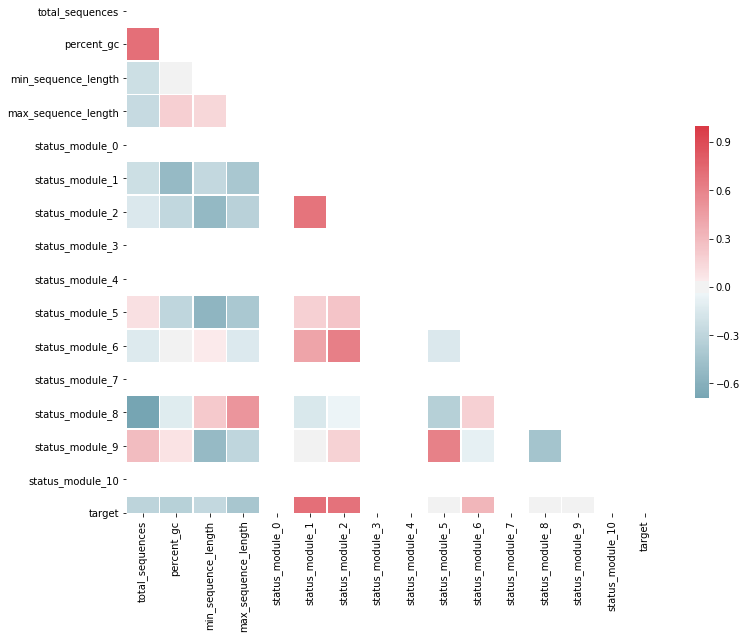

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.625


#### Random Forest Training

In [13]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [14]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [15]:
y_pred=clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Feature Importance

Text(0.5, 0, 'Relative Importance')

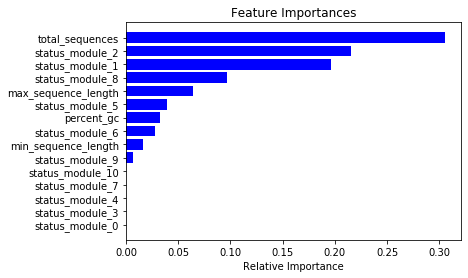

In [16]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')